In [2]:
import pandas as pd
import nltk,string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
import re
import multiprocessing
from gensim.models.phrases import Phrases, Phraser
from collections import defaultdict
from time import time
import spacy
import logging
import glob, os 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from tqdm import tqdm
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)


In [8]:
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "IRAhandle_tweets_*.csv"))))

C:\Users\Rajnish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rajnish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Rajnish\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
stop_words = set(nltk.corpus.stopwords.words('english'))
stop_words.add('"')
stop_words.add('\\')
global regex 
porter = PorterStemmer()
regex = re.compile('[%s]' % re.escape(string.punctuation[0:2] + string.punctuation[3:]))
def cleanText(text):
    text = str(text)
    text = re.sub(r'http\S+', r' ', text)
    text = regex.sub('', text)
    text = text.lower()
    sentence = ''
    for word in text.split(' '):
        if word not in stop_words:
            sentence += porter.stem(word) + ' '
    text = sentence
    return text

In [10]:
df_new=df[df['language']=='English']
df_new['content']=df_new['content'].apply(cleanText)

C:\Users\Rajnish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:

cores = multiprocessing.cpu_count()

In [21]:
t = time()

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores, progress_per=10000)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

100%|███████████████████████████████████████████████████████████████████| 2062344/2062344 [00:00<00:00, 2536274.98it/s]
INFO - 19:07:24: collecting all words and their counts
INFO - 19:07:24: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
INFO - 19:07:24: PROGRESS: at example #10000, processed 108361 words (426861/s), 31859 word types, 1356 tags
INFO - 19:07:25: PROGRESS: at example #20000, processed 216168 words (750010/s), 51299 word types, 1649 tags
INFO - 19:07:25: PROGRESS: at example #30000, processed 324091 words (749627/s), 67235 word types, 1808 tags
INFO - 19:07:25: PROGRESS: at example #40000, processed 432340 words (717823/s), 81824 word types, 1930 tags
INFO - 19:07:25: PROGRESS: at example #50000, processed 539777 words (974893/s), 94935 word types, 2010 tags
INFO - 19:07:25: PROGRESS: at example #60000, processed 647048 words (599753/s), 107147 word types, 2069 tags
INFO - 19:07:25: PROGRESS: at example #70000, processed 754855 words (628032/s), 1

INFO - 19:07:34: PROGRESS: at example #720000, processed 7759244 words (1208259/s), 549194 word types, 2735 tags
INFO - 19:07:34: PROGRESS: at example #730000, processed 7866609 words (1083032/s), 554263 word types, 2736 tags
INFO - 19:07:34: PROGRESS: at example #740000, processed 7974302 words (934938/s), 559368 word types, 2739 tags
INFO - 19:07:34: PROGRESS: at example #750000, processed 8081224 words (1170343/s), 564414 word types, 2741 tags
INFO - 19:07:34: PROGRESS: at example #760000, processed 8189038 words (1120089/s), 569281 word types, 2741 tags
INFO - 19:07:34: PROGRESS: at example #770000, processed 8296688 words (1211512/s), 574223 word types, 2742 tags
INFO - 19:07:34: PROGRESS: at example #780000, processed 8403640 words (1195184/s), 579033 word types, 2744 tags
INFO - 19:07:35: PROGRESS: at example #790000, processed 8510983 words (1061626/s), 583891 word types, 2745 tags
INFO - 19:07:35: PROGRESS: at example #800000, processed 8618820 words (1239000/s), 588697 word t

INFO - 19:07:42: PROGRESS: at example #1440000, processed 15518924 words (1045721/s), 863741 word types, 2798 tags
INFO - 19:07:42: PROGRESS: at example #1450000, processed 15626345 words (1066498/s), 867788 word types, 2798 tags
INFO - 19:07:42: PROGRESS: at example #1460000, processed 15733639 words (922759/s), 871701 word types, 2799 tags
INFO - 19:07:42: PROGRESS: at example #1470000, processed 15840921 words (907731/s), 875407 word types, 2799 tags
INFO - 19:07:42: PROGRESS: at example #1480000, processed 15948210 words (958998/s), 879420 word types, 2800 tags
INFO - 19:07:42: PROGRESS: at example #1490000, processed 16056632 words (626330/s), 883126 word types, 2801 tags
INFO - 19:07:43: PROGRESS: at example #1500000, processed 16164497 words (329244/s), 887015 word types, 2802 tags
INFO - 19:07:43: PROGRESS: at example #1510000, processed 16271833 words (1162525/s), 890809 word types, 2802 tags
INFO - 19:07:43: PROGRESS: at example #1520000, processed 16379930 words (1107167/s),

Time to build vocab: 0.55 mins


In [22]:
t=time()

#for epoch in range(30):
model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=30)
model_dbow.alpha -= 0.002
model_dbow.min_alpha = model_dbow.alpha

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

100%|███████████████████████████████████████████████████████████████████| 2062344/2062344 [00:00<00:00, 3395496.13it/s]
INFO - 19:07:58: training model with 8 workers on 395290 vocabulary and 300 features, using sg=1 hs=0 sample=0 negative=5 window=5
INFO - 19:08:00: EPOCH 1 - PROGRESS: at 0.41% examples, 71496 words/s, in_qsize 16, out_qsize 0
INFO - 19:08:01: EPOCH 1 - PROGRESS: at 1.12% examples, 96355 words/s, in_qsize 15, out_qsize 0
INFO - 19:08:02: EPOCH 1 - PROGRESS: at 2.21% examples, 135487 words/s, in_qsize 16, out_qsize 0
INFO - 19:08:03: EPOCH 1 - PROGRESS: at 3.56% examples, 173029 words/s, in_qsize 16, out_qsize 0
INFO - 19:08:04: EPOCH 1 - PROGRESS: at 4.73% examples, 185258 words/s, in_qsize 16, out_qsize 0
INFO - 19:08:05: EPOCH 1 - PROGRESS: at 6.08% examples, 203840 words/s, in_qsize 16, out_qsize 0
INFO - 19:08:06: EPOCH 1 - PROGRESS: at 7.25% examples, 209744 words/s, in_qsize 15, out_qsize 0
INFO - 19:08:07: EPOCH 1 - PROGRESS: at 8.51% examples, 218966 words/s, 

INFO - 19:09:21: worker thread finished; awaiting finish of 2 more threads
INFO - 19:09:21: worker thread finished; awaiting finish of 1 more threads
INFO - 19:09:21: worker thread finished; awaiting finish of 0 more threads
INFO - 19:09:21: EPOCH - 1 : training on 22220832 raw words (23589349 effective words) took 82.5s, 286016 effective words/s
INFO - 19:09:22: EPOCH 2 - PROGRESS: at 1.12% examples, 224711 words/s, in_qsize 15, out_qsize 0
INFO - 19:09:23: EPOCH 2 - PROGRESS: at 2.48% examples, 267713 words/s, in_qsize 16, out_qsize 0
INFO - 19:09:24: EPOCH 2 - PROGRESS: at 3.65% examples, 264913 words/s, in_qsize 15, out_qsize 0
INFO - 19:09:25: EPOCH 2 - PROGRESS: at 5.09% examples, 274446 words/s, in_qsize 15, out_qsize 0
INFO - 19:09:26: EPOCH 2 - PROGRESS: at 6.53% examples, 282788 words/s, in_qsize 16, out_qsize 0
INFO - 19:09:27: EPOCH 2 - PROGRESS: at 7.97% examples, 285895 words/s, in_qsize 15, out_qsize 0
INFO - 19:09:28: EPOCH 2 - PROGRESS: at 9.41% examples, 287594 words/

INFO - 19:10:39: EPOCH - 2 : training on 22220832 raw words (23589349 effective words) took 78.7s, 299598 effective words/s
INFO - 19:10:41: EPOCH 3 - PROGRESS: at 1.12% examples, 245175 words/s, in_qsize 16, out_qsize 0
INFO - 19:10:42: EPOCH 3 - PROGRESS: at 2.57% examples, 275203 words/s, in_qsize 15, out_qsize 0
INFO - 19:10:43: EPOCH 3 - PROGRESS: at 4.01% examples, 284769 words/s, in_qsize 15, out_qsize 0
INFO - 19:10:44: EPOCH 3 - PROGRESS: at 5.45% examples, 292605 words/s, in_qsize 16, out_qsize 0
INFO - 19:10:45: EPOCH 3 - PROGRESS: at 6.84% examples, 297253 words/s, in_qsize 15, out_qsize 0
INFO - 19:10:46: EPOCH 3 - PROGRESS: at 8.06% examples, 293303 words/s, in_qsize 16, out_qsize 0
INFO - 19:10:47: EPOCH 3 - PROGRESS: at 9.45% examples, 296323 words/s, in_qsize 15, out_qsize 0
INFO - 19:10:48: EPOCH 3 - PROGRESS: at 10.88% examples, 297527 words/s, in_qsize 15, out_qsize 0
INFO - 19:10:49: EPOCH 3 - PROGRESS: at 12.28% examples, 300003 words/s, in_qsize 16, out_qsize 0
I

INFO - 19:12:03: worker thread finished; awaiting finish of 3 more threads
INFO - 19:12:03: worker thread finished; awaiting finish of 2 more threads
INFO - 19:12:03: worker thread finished; awaiting finish of 1 more threads
INFO - 19:12:03: worker thread finished; awaiting finish of 0 more threads
INFO - 19:12:03: EPOCH - 3 : training on 22220832 raw words (23589349 effective words) took 83.8s, 281576 effective words/s
INFO - 19:12:04: EPOCH 4 - PROGRESS: at 1.12% examples, 228618 words/s, in_qsize 16, out_qsize 0
INFO - 19:12:05: EPOCH 4 - PROGRESS: at 2.57% examples, 266889 words/s, in_qsize 15, out_qsize 0
INFO - 19:12:07: EPOCH 4 - PROGRESS: at 4.01% examples, 285520 words/s, in_qsize 16, out_qsize 0
INFO - 19:12:08: EPOCH 4 - PROGRESS: at 5.36% examples, 293070 words/s, in_qsize 16, out_qsize 0
INFO - 19:12:09: EPOCH 4 - PROGRESS: at 6.57% examples, 291511 words/s, in_qsize 16, out_qsize 0
INFO - 19:12:10: EPOCH 4 - PROGRESS: at 7.88% examples, 294001 words/s, in_qsize 16, out_qs

INFO - 19:13:19: EPOCH 5 - PROGRESS: at 7.02% examples, 329773 words/s, in_qsize 16, out_qsize 0
INFO - 19:13:20: EPOCH 5 - PROGRESS: at 8.51% examples, 332411 words/s, in_qsize 15, out_qsize 0
INFO - 19:13:21: EPOCH 5 - PROGRESS: at 9.99% examples, 334701 words/s, in_qsize 16, out_qsize 0
INFO - 19:13:22: EPOCH 5 - PROGRESS: at 11.33% examples, 331685 words/s, in_qsize 16, out_qsize 0
INFO - 19:13:23: EPOCH 5 - PROGRESS: at 12.77% examples, 331265 words/s, in_qsize 15, out_qsize 0
INFO - 19:13:24: EPOCH 5 - PROGRESS: at 14.25% examples, 332835 words/s, in_qsize 15, out_qsize 0
INFO - 19:13:25: EPOCH 5 - PROGRESS: at 15.73% examples, 333748 words/s, in_qsize 15, out_qsize 0
INFO - 19:13:26: EPOCH 5 - PROGRESS: at 17.22% examples, 334739 words/s, in_qsize 16, out_qsize 0
INFO - 19:13:27: EPOCH 5 - PROGRESS: at 18.75% examples, 335664 words/s, in_qsize 16, out_qsize 0
INFO - 19:13:28: EPOCH 5 - PROGRESS: at 20.24% examples, 336398 words/s, in_qsize 15, out_qsize 0
INFO - 19:13:29: EPOCH 

INFO - 19:14:38: EPOCH 6 - PROGRESS: at 21.99% examples, 339750 words/s, in_qsize 16, out_qsize 0
INFO - 19:14:39: EPOCH 6 - PROGRESS: at 23.48% examples, 340323 words/s, in_qsize 16, out_qsize 0
INFO - 19:14:40: EPOCH 6 - PROGRESS: at 24.96% examples, 339799 words/s, in_qsize 15, out_qsize 0
INFO - 19:14:41: EPOCH 6 - PROGRESS: at 26.44% examples, 339591 words/s, in_qsize 16, out_qsize 0
INFO - 19:14:42: EPOCH 6 - PROGRESS: at 27.98% examples, 340377 words/s, in_qsize 16, out_qsize 1
INFO - 19:14:43: EPOCH 6 - PROGRESS: at 29.51% examples, 341264 words/s, in_qsize 15, out_qsize 0
INFO - 19:14:44: EPOCH 6 - PROGRESS: at 31.04% examples, 341042 words/s, in_qsize 16, out_qsize 0
INFO - 19:14:45: EPOCH 6 - PROGRESS: at 32.48% examples, 340876 words/s, in_qsize 16, out_qsize 0
INFO - 19:14:46: EPOCH 6 - PROGRESS: at 33.96% examples, 341085 words/s, in_qsize 15, out_qsize 0
INFO - 19:14:47: EPOCH 6 - PROGRESS: at 35.44% examples, 341372 words/s, in_qsize 16, out_qsize 0
INFO - 19:14:48: EPO

INFO - 19:15:57: EPOCH 7 - PROGRESS: at 29.96% examples, 296085 words/s, in_qsize 16, out_qsize 0
INFO - 19:15:58: EPOCH 7 - PROGRESS: at 31.09% examples, 294204 words/s, in_qsize 15, out_qsize 0
INFO - 19:15:59: EPOCH 7 - PROGRESS: at 32.25% examples, 293068 words/s, in_qsize 15, out_qsize 0
INFO - 19:16:00: EPOCH 7 - PROGRESS: at 33.69% examples, 294608 words/s, in_qsize 16, out_qsize 0
INFO - 19:16:01: EPOCH 7 - PROGRESS: at 35.13% examples, 296002 words/s, in_qsize 15, out_qsize 0
INFO - 19:16:02: EPOCH 7 - PROGRESS: at 36.44% examples, 296216 words/s, in_qsize 15, out_qsize 0
INFO - 19:16:03: EPOCH 7 - PROGRESS: at 37.61% examples, 295493 words/s, in_qsize 15, out_qsize 0
INFO - 19:16:04: EPOCH 7 - PROGRESS: at 39.05% examples, 296576 words/s, in_qsize 15, out_qsize 0
INFO - 19:16:05: EPOCH 7 - PROGRESS: at 40.46% examples, 297485 words/s, in_qsize 16, out_qsize 0
INFO - 19:16:07: EPOCH 7 - PROGRESS: at 41.76% examples, 297563 words/s, in_qsize 15, out_qsize 0
INFO - 19:16:08: EPO

INFO - 19:17:17: EPOCH 8 - PROGRESS: at 37.03% examples, 325895 words/s, in_qsize 16, out_qsize 0
INFO - 19:17:18: EPOCH 8 - PROGRESS: at 38.38% examples, 325474 words/s, in_qsize 16, out_qsize 0
INFO - 19:17:19: EPOCH 8 - PROGRESS: at 39.50% examples, 322286 words/s, in_qsize 15, out_qsize 0
INFO - 19:17:20: EPOCH 8 - PROGRESS: at 41.04% examples, 323501 words/s, in_qsize 16, out_qsize 0
INFO - 19:17:21: EPOCH 8 - PROGRESS: at 42.53% examples, 324135 words/s, in_qsize 15, out_qsize 0
INFO - 19:17:22: EPOCH 8 - PROGRESS: at 43.91% examples, 323812 words/s, in_qsize 16, out_qsize 0
INFO - 19:17:23: EPOCH 8 - PROGRESS: at 45.36% examples, 323933 words/s, in_qsize 15, out_qsize 0
INFO - 19:17:24: EPOCH 8 - PROGRESS: at 46.88% examples, 324925 words/s, in_qsize 15, out_qsize 0
INFO - 19:17:25: EPOCH 8 - PROGRESS: at 48.14% examples, 323945 words/s, in_qsize 15, out_qsize 0
INFO - 19:17:26: EPOCH 8 - PROGRESS: at 49.58% examples, 324292 words/s, in_qsize 15, out_qsize 0
INFO - 19:17:27: EPO

INFO - 19:18:37: EPOCH 9 - PROGRESS: at 48.05% examples, 320334 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:38: EPOCH 9 - PROGRESS: at 49.53% examples, 321087 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:39: EPOCH 9 - PROGRESS: at 51.01% examples, 321539 words/s, in_qsize 16, out_qsize 0
INFO - 19:18:40: EPOCH 9 - PROGRESS: at 52.48% examples, 322035 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:41: EPOCH 9 - PROGRESS: at 54.01% examples, 322775 words/s, in_qsize 16, out_qsize 0
INFO - 19:18:42: EPOCH 9 - PROGRESS: at 55.50% examples, 323358 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:43: EPOCH 9 - PROGRESS: at 56.98% examples, 323950 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:44: EPOCH 9 - PROGRESS: at 58.47% examples, 324511 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:45: EPOCH 9 - PROGRESS: at 59.82% examples, 324277 words/s, in_qsize 15, out_qsize 0
INFO - 19:18:46: EPOCH 9 - PROGRESS: at 61.17% examples, 324028 words/s, in_qsize 16, out_qsize 0
INFO - 19:18:47: EPO

INFO - 19:19:56: EPOCH 10 - PROGRESS: at 52.57% examples, 315650 words/s, in_qsize 16, out_qsize 0
INFO - 19:19:57: EPOCH 10 - PROGRESS: at 53.61% examples, 313498 words/s, in_qsize 15, out_qsize 0
INFO - 19:19:58: EPOCH 10 - PROGRESS: at 55.05% examples, 313651 words/s, in_qsize 16, out_qsize 0
INFO - 19:19:59: EPOCH 10 - PROGRESS: at 56.13% examples, 311632 words/s, in_qsize 15, out_qsize 0
INFO - 19:20:00: EPOCH 10 - PROGRESS: at 57.38% examples, 310834 words/s, in_qsize 16, out_qsize 0
INFO - 19:20:01: EPOCH 10 - PROGRESS: at 58.51% examples, 309476 words/s, in_qsize 15, out_qsize 0
INFO - 19:20:02: EPOCH 10 - PROGRESS: at 59.68% examples, 308007 words/s, in_qsize 16, out_qsize 0
INFO - 19:20:03: EPOCH 10 - PROGRESS: at 61.08% examples, 308315 words/s, in_qsize 16, out_qsize 0
INFO - 19:20:04: EPOCH 10 - PROGRESS: at 62.39% examples, 308262 words/s, in_qsize 15, out_qsize 0
INFO - 19:20:05: EPOCH 10 - PROGRESS: at 63.69% examples, 308102 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:21:14: EPOCH 11 - PROGRESS: at 53.03% examples, 289408 words/s, in_qsize 16, out_qsize 0
INFO - 19:21:15: EPOCH 11 - PROGRESS: at 54.42% examples, 289983 words/s, in_qsize 15, out_qsize 0
INFO - 19:21:16: EPOCH 11 - PROGRESS: at 55.81% examples, 290812 words/s, in_qsize 16, out_qsize 0
INFO - 19:21:17: EPOCH 11 - PROGRESS: at 57.16% examples, 291218 words/s, in_qsize 15, out_qsize 0
INFO - 19:21:18: EPOCH 11 - PROGRESS: at 58.38% examples, 291026 words/s, in_qsize 15, out_qsize 0
INFO - 19:21:19: EPOCH 11 - PROGRESS: at 59.46% examples, 290253 words/s, in_qsize 15, out_qsize 0
INFO - 19:21:20: EPOCH 11 - PROGRESS: at 60.72% examples, 290289 words/s, in_qsize 16, out_qsize 0
INFO - 19:21:21: EPOCH 11 - PROGRESS: at 62.07% examples, 290618 words/s, in_qsize 15, out_qsize 0
INFO - 19:21:22: EPOCH 11 - PROGRESS: at 63.24% examples, 290237 words/s, in_qsize 16, out_qsize 0
INFO - 19:21:23: EPOCH 11 - PROGRESS: at 64.59% examples, 290753 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:22:34: EPOCH 12 - PROGRESS: at 56.85% examples, 306266 words/s, in_qsize 15, out_qsize 0
INFO - 19:22:35: EPOCH 12 - PROGRESS: at 58.29% examples, 306693 words/s, in_qsize 16, out_qsize 0
INFO - 19:22:36: EPOCH 12 - PROGRESS: at 59.73% examples, 306940 words/s, in_qsize 15, out_qsize 0
INFO - 19:22:37: EPOCH 12 - PROGRESS: at 61.17% examples, 307291 words/s, in_qsize 16, out_qsize 0
INFO - 19:22:38: EPOCH 12 - PROGRESS: at 62.52% examples, 307468 words/s, in_qsize 15, out_qsize 0
INFO - 19:22:39: EPOCH 12 - PROGRESS: at 63.51% examples, 305909 words/s, in_qsize 16, out_qsize 0
INFO - 19:22:40: EPOCH 12 - PROGRESS: at 64.41% examples, 303264 words/s, in_qsize 15, out_qsize 0
INFO - 19:22:41: EPOCH 12 - PROGRESS: at 65.40% examples, 301815 words/s, in_qsize 15, out_qsize 0
INFO - 19:22:42: EPOCH 12 - PROGRESS: at 66.48% examples, 300837 words/s, in_qsize 15, out_qsize 0
INFO - 19:22:43: EPOCH 12 - PROGRESS: at 67.52% examples, 299505 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:23:54: EPOCH 13 - PROGRESS: at 57.20% examples, 312894 words/s, in_qsize 15, out_qsize 0
INFO - 19:23:55: EPOCH 13 - PROGRESS: at 58.65% examples, 313096 words/s, in_qsize 15, out_qsize 0
INFO - 19:23:56: EPOCH 13 - PROGRESS: at 60.09% examples, 313020 words/s, in_qsize 15, out_qsize 1
INFO - 19:23:57: EPOCH 13 - PROGRESS: at 61.53% examples, 312851 words/s, in_qsize 16, out_qsize 0
INFO - 19:23:58: EPOCH 13 - PROGRESS: at 62.97% examples, 313136 words/s, in_qsize 15, out_qsize 0
INFO - 19:23:59: EPOCH 13 - PROGRESS: at 64.41% examples, 313283 words/s, in_qsize 15, out_qsize 0
INFO - 19:24:00: EPOCH 13 - PROGRESS: at 65.62% examples, 312694 words/s, in_qsize 15, out_qsize 0
INFO - 19:24:01: EPOCH 13 - PROGRESS: at 66.93% examples, 312537 words/s, in_qsize 15, out_qsize 0
INFO - 19:24:02: EPOCH 13 - PROGRESS: at 68.37% examples, 312746 words/s, in_qsize 16, out_qsize 0
INFO - 19:24:03: EPOCH 13 - PROGRESS: at 69.80% examples, 313034 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:25:13: EPOCH 14 - PROGRESS: at 60.81% examples, 300242 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:14: EPOCH 14 - PROGRESS: at 62.29% examples, 301076 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:15: EPOCH 14 - PROGRESS: at 63.64% examples, 301382 words/s, in_qsize 16, out_qsize 0
INFO - 19:25:16: EPOCH 14 - PROGRESS: at 64.81% examples, 300715 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:17: EPOCH 14 - PROGRESS: at 66.21% examples, 301050 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:18: EPOCH 14 - PROGRESS: at 67.65% examples, 301716 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:19: EPOCH 14 - PROGRESS: at 69.00% examples, 301826 words/s, in_qsize 16, out_qsize 0
INFO - 19:25:20: EPOCH 14 - PROGRESS: at 70.25% examples, 301605 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:21: EPOCH 14 - PROGRESS: at 71.59% examples, 301891 words/s, in_qsize 15, out_qsize 0
INFO - 19:25:22: EPOCH 14 - PROGRESS: at 72.72% examples, 301230 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:26:33: EPOCH 15 - PROGRESS: at 56.71% examples, 283983 words/s, in_qsize 16, out_qsize 0
INFO - 19:26:34: EPOCH 15 - PROGRESS: at 58.02% examples, 284405 words/s, in_qsize 16, out_qsize 0
INFO - 19:26:35: EPOCH 15 - PROGRESS: at 59.37% examples, 285097 words/s, in_qsize 15, out_qsize 0
INFO - 19:26:36: EPOCH 15 - PROGRESS: at 60.72% examples, 285733 words/s, in_qsize 16, out_qsize 0
INFO - 19:26:37: EPOCH 15 - PROGRESS: at 62.16% examples, 286581 words/s, in_qsize 16, out_qsize 0
INFO - 19:26:38: EPOCH 15 - PROGRESS: at 63.60% examples, 287221 words/s, in_qsize 15, out_qsize 0
INFO - 19:26:39: EPOCH 15 - PROGRESS: at 64.90% examples, 287384 words/s, in_qsize 15, out_qsize 0
INFO - 19:26:40: EPOCH 15 - PROGRESS: at 66.25% examples, 287921 words/s, in_qsize 15, out_qsize 0
INFO - 19:26:41: EPOCH 15 - PROGRESS: at 67.65% examples, 288541 words/s, in_qsize 16, out_qsize 0
INFO - 19:26:42: EPOCH 15 - PROGRESS: at 69.05% examples, 289030 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:27:53: EPOCH 16 - PROGRESS: at 64.27% examples, 315620 words/s, in_qsize 16, out_qsize 0
INFO - 19:27:54: EPOCH 16 - PROGRESS: at 65.71% examples, 315809 words/s, in_qsize 16, out_qsize 0
INFO - 19:27:55: EPOCH 16 - PROGRESS: at 67.16% examples, 315812 words/s, in_qsize 15, out_qsize 0
INFO - 19:27:56: EPOCH 16 - PROGRESS: at 68.59% examples, 315996 words/s, in_qsize 15, out_qsize 0
INFO - 19:27:57: EPOCH 16 - PROGRESS: at 69.98% examples, 316186 words/s, in_qsize 15, out_qsize 0
INFO - 19:27:58: EPOCH 16 - PROGRESS: at 71.33% examples, 316124 words/s, in_qsize 16, out_qsize 0
INFO - 19:27:59: EPOCH 16 - PROGRESS: at 72.72% examples, 316153 words/s, in_qsize 15, out_qsize 0
INFO - 19:28:00: EPOCH 16 - PROGRESS: at 74.07% examples, 316169 words/s, in_qsize 15, out_qsize 0
INFO - 19:28:01: EPOCH 16 - PROGRESS: at 75.47% examples, 316170 words/s, in_qsize 15, out_qsize 0
INFO - 19:28:02: EPOCH 16 - PROGRESS: at 76.86% examples, 316352 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:29:12: EPOCH 17 - PROGRESS: at 75.24% examples, 335978 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:13: EPOCH 17 - PROGRESS: at 76.73% examples, 336145 words/s, in_qsize 16, out_qsize 0
INFO - 19:29:14: EPOCH 17 - PROGRESS: at 78.22% examples, 336255 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:15: EPOCH 17 - PROGRESS: at 79.75% examples, 336502 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:16: EPOCH 17 - PROGRESS: at 81.28% examples, 336577 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:17: EPOCH 17 - PROGRESS: at 82.76% examples, 336786 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:18: EPOCH 17 - PROGRESS: at 84.29% examples, 337095 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:19: EPOCH 17 - PROGRESS: at 85.77% examples, 337251 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:20: EPOCH 17 - PROGRESS: at 87.30% examples, 337262 words/s, in_qsize 15, out_qsize 0
INFO - 19:29:21: EPOCH 17 - PROGRESS: at 88.74% examples, 337192 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:30:31: EPOCH 18 - PROGRESS: at 82.85% examples, 315786 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:32: EPOCH 18 - PROGRESS: at 84.24% examples, 315570 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:33: EPOCH 18 - PROGRESS: at 85.50% examples, 315221 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:34: EPOCH 18 - PROGRESS: at 86.94% examples, 315590 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:35: EPOCH 18 - PROGRESS: at 88.43% examples, 315980 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:36: EPOCH 18 - PROGRESS: at 89.96% examples, 316598 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:37: EPOCH 18 - PROGRESS: at 91.44% examples, 316735 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:38: EPOCH 18 - PROGRESS: at 92.98% examples, 317015 words/s, in_qsize 15, out_qsize 0
INFO - 19:30:39: EPOCH 18 - PROGRESS: at 94.46% examples, 317417 words/s, in_qsize 16, out_qsize 0
INFO - 19:30:40: EPOCH 18 - PROGRESS: at 95.90% examples, 317692 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:31:51: EPOCH 19 - PROGRESS: at 80.78% examples, 282949 words/s, in_qsize 16, out_qsize 0
INFO - 19:31:52: EPOCH 19 - PROGRESS: at 82.09% examples, 283185 words/s, in_qsize 15, out_qsize 0
INFO - 19:31:53: EPOCH 19 - PROGRESS: at 83.34% examples, 283364 words/s, in_qsize 15, out_qsize 0
INFO - 19:31:54: EPOCH 19 - PROGRESS: at 84.74% examples, 283957 words/s, in_qsize 16, out_qsize 0
INFO - 19:31:55: EPOCH 19 - PROGRESS: at 86.13% examples, 284470 words/s, in_qsize 15, out_qsize 0
INFO - 19:31:56: EPOCH 19 - PROGRESS: at 87.52% examples, 285084 words/s, in_qsize 16, out_qsize 0
INFO - 19:31:57: EPOCH 19 - PROGRESS: at 88.88% examples, 285471 words/s, in_qsize 15, out_qsize 0
INFO - 19:31:58: EPOCH 19 - PROGRESS: at 90.28% examples, 285976 words/s, in_qsize 15, out_qsize 0
INFO - 19:31:59: EPOCH 19 - PROGRESS: at 91.67% examples, 286494 words/s, in_qsize 15, out_qsize 0
INFO - 19:32:00: EPOCH 19 - PROGRESS: at 93.07% examples, 286921 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:33:10: EPOCH 20 - PROGRESS: at 84.11% examples, 302394 words/s, in_qsize 15, out_qsize 0
INFO - 19:33:11: EPOCH 20 - PROGRESS: at 85.55% examples, 302568 words/s, in_qsize 15, out_qsize 0
INFO - 19:33:13: EPOCH 20 - PROGRESS: at 86.98% examples, 302794 words/s, in_qsize 16, out_qsize 0
INFO - 19:33:14: EPOCH 20 - PROGRESS: at 88.43% examples, 303101 words/s, in_qsize 16, out_qsize 0
INFO - 19:33:15: EPOCH 20 - PROGRESS: at 89.87% examples, 303435 words/s, in_qsize 15, out_qsize 0
INFO - 19:33:16: EPOCH 20 - PROGRESS: at 91.22% examples, 303619 words/s, in_qsize 16, out_qsize 0
INFO - 19:33:17: EPOCH 20 - PROGRESS: at 92.66% examples, 303940 words/s, in_qsize 15, out_qsize 0
INFO - 19:33:18: EPOCH 20 - PROGRESS: at 94.10% examples, 304194 words/s, in_qsize 15, out_qsize 0
INFO - 19:33:19: EPOCH 20 - PROGRESS: at 95.54% examples, 304449 words/s, in_qsize 15, out_qsize 0
INFO - 19:33:20: EPOCH 20 - PROGRESS: at 96.97% examples, 304755 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:34:30: EPOCH 21 - PROGRESS: at 84.65% examples, 295630 words/s, in_qsize 15, out_qsize 0
INFO - 19:34:31: EPOCH 21 - PROGRESS: at 86.09% examples, 295981 words/s, in_qsize 16, out_qsize 0
INFO - 19:34:32: EPOCH 21 - PROGRESS: at 87.52% examples, 296481 words/s, in_qsize 15, out_qsize 0
INFO - 19:34:33: EPOCH 21 - PROGRESS: at 88.97% examples, 296795 words/s, in_qsize 16, out_qsize 0
INFO - 19:34:34: EPOCH 21 - PROGRESS: at 90.41% examples, 297116 words/s, in_qsize 16, out_qsize 0
INFO - 19:34:35: EPOCH 21 - PROGRESS: at 91.80% examples, 297541 words/s, in_qsize 15, out_qsize 0
INFO - 19:34:36: EPOCH 21 - PROGRESS: at 93.11% examples, 297251 words/s, in_qsize 15, out_qsize 0
INFO - 19:34:37: EPOCH 21 - PROGRESS: at 94.24% examples, 296764 words/s, in_qsize 15, out_qsize 0
INFO - 19:34:38: EPOCH 21 - PROGRESS: at 95.49% examples, 296696 words/s, in_qsize 15, out_qsize 0
INFO - 19:34:39: EPOCH 21 - PROGRESS: at 96.88% examples, 297054 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:35:49: EPOCH 22 - PROGRESS: at 90.28% examples, 313927 words/s, in_qsize 15, out_qsize 0
INFO - 19:35:50: EPOCH 22 - PROGRESS: at 91.71% examples, 314118 words/s, in_qsize 15, out_qsize 0
INFO - 19:35:51: EPOCH 22 - PROGRESS: at 93.07% examples, 314057 words/s, in_qsize 15, out_qsize 0
INFO - 19:35:52: EPOCH 22 - PROGRESS: at 94.37% examples, 313921 words/s, in_qsize 16, out_qsize 0
INFO - 19:35:53: EPOCH 22 - PROGRESS: at 95.76% examples, 313958 words/s, in_qsize 15, out_qsize 0
INFO - 19:35:54: EPOCH 22 - PROGRESS: at 97.11% examples, 313927 words/s, in_qsize 16, out_qsize 0
INFO - 19:35:55: EPOCH 22 - PROGRESS: at 98.50% examples, 314039 words/s, in_qsize 16, out_qsize 0
INFO - 19:35:56: worker thread finished; awaiting finish of 7 more threads
INFO - 19:35:56: worker thread finished; awaiting finish of 6 more threads
INFO - 19:35:56: worker thread finished; awaiting finish of 5 more threads
INFO - 19:35:56: worker thread finished; awaiting finish of 4 more threads
INFO - 

INFO - 19:37:08: EPOCH 23 - PROGRESS: at 87.79% examples, 290533 words/s, in_qsize 16, out_qsize 0
INFO - 19:37:09: EPOCH 23 - PROGRESS: at 88.79% examples, 289633 words/s, in_qsize 15, out_qsize 0
INFO - 19:37:10: EPOCH 23 - PROGRESS: at 90.23% examples, 290044 words/s, in_qsize 15, out_qsize 0
INFO - 19:37:11: EPOCH 23 - PROGRESS: at 91.31% examples, 289211 words/s, in_qsize 15, out_qsize 0
INFO - 19:37:12: EPOCH 23 - PROGRESS: at 92.75% examples, 289644 words/s, in_qsize 16, out_qsize 0
INFO - 19:37:13: EPOCH 23 - PROGRESS: at 93.97% examples, 289527 words/s, in_qsize 16, out_qsize 0
INFO - 19:37:14: EPOCH 23 - PROGRESS: at 95.23% examples, 289551 words/s, in_qsize 15, out_qsize 0
INFO - 19:37:15: EPOCH 23 - PROGRESS: at 96.48% examples, 289633 words/s, in_qsize 16, out_qsize 0
INFO - 19:37:16: EPOCH 23 - PROGRESS: at 97.65% examples, 289444 words/s, in_qsize 16, out_qsize 0
INFO - 19:37:17: EPOCH 23 - PROGRESS: at 99.04% examples, 289861 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:38:27: EPOCH 24 - PROGRESS: at 85.91% examples, 289311 words/s, in_qsize 16, out_qsize 0
INFO - 19:38:29: EPOCH 24 - PROGRESS: at 87.34% examples, 289717 words/s, in_qsize 15, out_qsize 0
INFO - 19:38:30: EPOCH 24 - PROGRESS: at 88.52% examples, 289513 words/s, in_qsize 16, out_qsize 0
INFO - 19:38:31: EPOCH 24 - PROGRESS: at 89.74% examples, 289458 words/s, in_qsize 16, out_qsize 0
INFO - 19:38:32: EPOCH 24 - PROGRESS: at 91.13% examples, 289974 words/s, in_qsize 15, out_qsize 0
INFO - 19:38:33: EPOCH 24 - PROGRESS: at 92.39% examples, 289708 words/s, in_qsize 15, out_qsize 0
INFO - 19:38:34: EPOCH 24 - PROGRESS: at 93.65% examples, 289714 words/s, in_qsize 15, out_qsize 0
INFO - 19:38:35: EPOCH 24 - PROGRESS: at 95.04% examples, 290208 words/s, in_qsize 15, out_qsize 0
INFO - 19:38:36: EPOCH 24 - PROGRESS: at 96.44% examples, 290671 words/s, in_qsize 15, out_qsize 0
INFO - 19:38:37: EPOCH 24 - PROGRESS: at 97.82% examples, 291148 words/s, in_qsize 15, out_qsize 0
INFO - 19:

INFO - 19:39:46: EPOCH 25 - PROGRESS: at 91.36% examples, 315688 words/s, in_qsize 16, out_qsize 0
INFO - 19:39:47: EPOCH 25 - PROGRESS: at 92.80% examples, 315715 words/s, in_qsize 15, out_qsize 0
INFO - 19:39:48: EPOCH 25 - PROGRESS: at 94.24% examples, 315875 words/s, in_qsize 15, out_qsize 0
INFO - 19:39:49: EPOCH 25 - PROGRESS: at 95.67% examples, 316068 words/s, in_qsize 15, out_qsize 0
INFO - 19:39:51: EPOCH 25 - PROGRESS: at 97.06% examples, 316131 words/s, in_qsize 16, out_qsize 0
INFO - 19:39:52: EPOCH 25 - PROGRESS: at 98.45% examples, 316219 words/s, in_qsize 15, out_qsize 0
INFO - 19:39:53: EPOCH 25 - PROGRESS: at 99.62% examples, 315586 words/s, in_qsize 9, out_qsize 0
INFO - 19:39:53: worker thread finished; awaiting finish of 7 more threads
INFO - 19:39:53: worker thread finished; awaiting finish of 6 more threads
INFO - 19:39:53: worker thread finished; awaiting finish of 5 more threads
INFO - 19:39:53: worker thread finished; awaiting finish of 4 more threads
INFO - 1

INFO - 19:41:05: EPOCH 26 - PROGRESS: at 95.67% examples, 312425 words/s, in_qsize 15, out_qsize 0
INFO - 19:41:06: EPOCH 26 - PROGRESS: at 97.11% examples, 312591 words/s, in_qsize 16, out_qsize 0
INFO - 19:41:07: EPOCH 26 - PROGRESS: at 98.54% examples, 312803 words/s, in_qsize 15, out_qsize 0
INFO - 19:41:08: worker thread finished; awaiting finish of 7 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 6 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 5 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 4 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 3 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 2 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 1 more threads
INFO - 19:41:08: worker thread finished; awaiting finish of 0 more threads
INFO - 19:41:08: EPOCH - 26 : training on 22220832 raw words (23589349 effective words) took 75.3s, 313

INFO - 19:42:24: EPOCH 27 - PROGRESS: at 95.85% examples, 296185 words/s, in_qsize 15, out_qsize 0
INFO - 19:42:25: EPOCH 27 - PROGRESS: at 96.84% examples, 295329 words/s, in_qsize 16, out_qsize 0
INFO - 19:42:26: EPOCH 27 - PROGRESS: at 97.65% examples, 293869 words/s, in_qsize 15, out_qsize 0
INFO - 19:42:27: EPOCH 27 - PROGRESS: at 98.72% examples, 293279 words/s, in_qsize 15, out_qsize 0
INFO - 19:42:28: EPOCH 27 - PROGRESS: at 99.58% examples, 291950 words/s, in_qsize 10, out_qsize 0
INFO - 19:42:29: worker thread finished; awaiting finish of 7 more threads
INFO - 19:42:29: worker thread finished; awaiting finish of 6 more threads
INFO - 19:42:29: worker thread finished; awaiting finish of 5 more threads
INFO - 19:42:29: worker thread finished; awaiting finish of 4 more threads
INFO - 19:42:29: worker thread finished; awaiting finish of 3 more threads
INFO - 19:42:29: worker thread finished; awaiting finish of 2 more threads
INFO - 19:42:29: worker thread finished; awaiting finis

INFO - 19:43:43: EPOCH 28 - PROGRESS: at 86.85% examples, 274391 words/s, in_qsize 15, out_qsize 0
INFO - 19:43:44: EPOCH 28 - PROGRESS: at 88.16% examples, 274825 words/s, in_qsize 15, out_qsize 0
INFO - 19:43:45: EPOCH 28 - PROGRESS: at 89.60% examples, 275666 words/s, in_qsize 15, out_qsize 0
INFO - 19:43:46: EPOCH 28 - PROGRESS: at 91.09% examples, 276593 words/s, in_qsize 15, out_qsize 0
INFO - 19:43:47: EPOCH 28 - PROGRESS: at 92.17% examples, 276217 words/s, in_qsize 16, out_qsize 0
INFO - 19:43:48: EPOCH 28 - PROGRESS: at 93.29% examples, 275829 words/s, in_qsize 15, out_qsize 0
INFO - 19:43:50: EPOCH 28 - PROGRESS: at 94.42% examples, 275620 words/s, in_qsize 16, out_qsize 0
INFO - 19:43:51: EPOCH 28 - PROGRESS: at 95.81% examples, 276072 words/s, in_qsize 16, out_qsize 0
INFO - 19:43:52: EPOCH 28 - PROGRESS: at 97.24% examples, 276575 words/s, in_qsize 16, out_qsize 0
INFO - 19:43:53: EPOCH 28 - PROGRESS: at 98.45% examples, 276671 words/s, in_qsize 16, out_qsize 0
INFO - 19:

INFO - 19:45:02: EPOCH 29 - PROGRESS: at 92.80% examples, 320293 words/s, in_qsize 16, out_qsize 0
INFO - 19:45:03: EPOCH 29 - PROGRESS: at 94.24% examples, 320317 words/s, in_qsize 16, out_qsize 0
INFO - 19:45:04: EPOCH 29 - PROGRESS: at 95.67% examples, 320479 words/s, in_qsize 15, out_qsize 0
INFO - 19:45:05: EPOCH 29 - PROGRESS: at 97.11% examples, 320515 words/s, in_qsize 15, out_qsize 0
INFO - 19:45:06: EPOCH 29 - PROGRESS: at 98.54% examples, 320549 words/s, in_qsize 15, out_qsize 0
INFO - 19:45:07: worker thread finished; awaiting finish of 7 more threads
INFO - 19:45:07: worker thread finished; awaiting finish of 6 more threads
INFO - 19:45:07: worker thread finished; awaiting finish of 5 more threads
INFO - 19:45:07: worker thread finished; awaiting finish of 4 more threads
INFO - 19:45:07: worker thread finished; awaiting finish of 3 more threads
INFO - 19:45:07: worker thread finished; awaiting finish of 2 more threads
INFO - 19:45:07: worker thread finished; awaiting finis

INFO - 19:46:20: worker thread finished; awaiting finish of 7 more threads
INFO - 19:46:20: worker thread finished; awaiting finish of 6 more threads
INFO - 19:46:20: worker thread finished; awaiting finish of 5 more threads
INFO - 19:46:20: worker thread finished; awaiting finish of 4 more threads
INFO - 19:46:20: worker thread finished; awaiting finish of 3 more threads
INFO - 19:46:20: worker thread finished; awaiting finish of 2 more threads
INFO - 19:46:21: worker thread finished; awaiting finish of 1 more threads
INFO - 19:46:21: worker thread finished; awaiting finish of 0 more threads
INFO - 19:46:21: EPOCH - 30 : training on 22220832 raw words (23589349 effective words) took 73.4s, 321485 effective words/s
INFO - 19:46:21: training on a 666624960 raw words (707680470 effective words) took 2302.5s, 307351 effective words/s


Time to build vocab: 38.4 mins


In [23]:
model_dbow.save("d2vtest.model")

INFO - 19:46:21: saving Doc2Vec object under d2vtest.model, separately None
INFO - 19:46:21: storing np array 'syn1neg' to d2vtest.model.trainables.syn1neg.npy
INFO - 19:46:22: storing np array 'vectors' to d2vtest.model.wv.vectors.npy
INFO - 19:46:25: saved d2vtest.model


In [138]:
model = Doc2Vec.load('d2v.model')

INFO - 20:21:39: loading Doc2Vec object from d2v.model
INFO - 20:21:42: loading vocabulary recursively from d2v.model.vocabulary.* with mmap=None
INFO - 20:21:42: loading trainables recursively from d2v.model.trainables.* with mmap=None
INFO - 20:21:42: loading syn1neg from d2v.model.trainables.syn1neg.npy with mmap=None
INFO - 20:21:43: loading wv recursively from d2v.model.wv.* with mmap=None
INFO - 20:21:43: loading vectors from d2v.model.wv.vectors.npy with mmap=None
INFO - 20:21:43: loading docvecs recursively from d2v.model.docvecs.* with mmap=None
INFO - 20:21:43: loaded d2v.model


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
words_ak = []
embeddings_ak = []
for word in list(model.wv.vocab):
    embeddings_ak.append(model.wv[word])
    words_ak.append(word)
    
tsne_ak_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_ak_2d = tsne_ak_2d.fit_transform(embeddings_ak)

def tsne_plot_2d(label, embeddings, words=[], a=1):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, 1))
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x, y, c=colors, alpha=a, label=label)
    for i, word in enumerate(words):
        plt.annotate(word, alpha=0.3, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig("hhh.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_2d('Cluster of the words in our Vocab', embeddings_ak_2d, a=0.1)

In [12]:
from textblob import TextBlob
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df_new['polarity'] = df_new['content'].apply(polarity)
df_new['subjectivity'] = df_new['content'].apply(subjectivity)

C:\Users\Rajnish\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rajnish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
df_new.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,polarity,subjectivity
0,906000000000000000,10_GOP,sit democrat us senat trial corrupt youv bare ...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,-0.225,0.55
1,906000000000000000,10_GOP,marshawn lynch arriv game antitrump shirt judg...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,-0.400,0.40
2,906000000000000000,10_GOP,daughter fallen navi sailor deliv power monolo...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,0.000,0.00
3,906000000000000000,10_GOP,presid trump dedic presid cup golf tournament ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,0.000,0.00
4,906000000000000000,10_GOP,19000 respect nation anthem #standforouranthem...,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,0.000,0.00


In [14]:
df_new['YearMonth'] = pd.DatetimeIndex(df_new['publish_date']).year

C:\Users\Rajnish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_new.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,polarity,subjectivity,YearMonth
0,906000000000000000,10_GOP,sit democrat us senat trial corrupt youv bare ...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,-0.225,0.55,2017
1,906000000000000000,10_GOP,marshawn lynch arriv game antitrump shirt judg...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,-0.400,0.40,2017
2,906000000000000000,10_GOP,daughter fallen navi sailor deliv power monolo...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,0.000,0.00,2017
3,906000000000000000,10_GOP,presid trump dedic presid cup golf tournament ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,0.000,0.00,2017
4,906000000000000000,10_GOP,19000 respect nation anthem #standforouranthem...,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,0.000,0.00,2017


In [16]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rajnish\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
L = ['trump', 'hillari','obama','donald','clinton','hillary','barrack']
pat = '|'.join(r"\b{}\b".format(x) for x in L)

df_new['tags'] = df_new['content'].str.extract('('+ pat + ')', expand=False, flags=re.I)
df_new.head()

C:\Users\Rajnish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,polarity,subjectivity,YearMonth,tags
0,906000000000000000,10_GOP,sit democrat us senat trial corrupt youv bare ...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,-0.225,0.55,2017,NaN
1,906000000000000000,10_GOP,marshawn lynch arriv game antitrump shirt judg...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,-0.400,0.40,2017,NaN
2,906000000000000000,10_GOP,daughter fallen navi sailor deliv power monolo...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,0.000,0.00,2017,NaN
3,906000000000000000,10_GOP,presid trump dedic presid cup golf tournament ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,0.000,0.00,2017,trump
4,906000000000000000,10_GOP,19000 respect nation anthem #standforouranthem...,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,0.000,0.00,2017,NaN


In [38]:
df_new1=df_new[(df_new['tags']=='trump') | (df_new['tags']=='donald')]
df_new2=df_new[(df_new['tags']=='hillari') | (df_new['tags']=='hillary')| (df_new['tags']=='clinton')]
df_new3=df_new[(df_new['tags']=='barrack') | (df_new['tags']=='obama')]


In [55]:
df_new2.head(30)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,polarity,subjectivity,YearMonth,tags
19,906000000000000000,10_GOP,took hillari abt 5 minut blame nra madman ramp...,Unknown,English,10/11/2017 20:26,10/11/2017 20:27,1070,10358,308,...,905874659358453760,918211323179171840,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/918211323179...,NaN,NaN,0.500000,0.833333,2017,hillari
33,906000000000000000,10_GOP,wait russian also purchas hillari clinton poke...,Unknown,English,10/12/2017 20:31,10/12/2017 20:32,1070,10399,323,...,905874659358453760,918574971395477504,http://twitter.com/905874659358453760/statuses...,https://twitter.com/PoliticalShort/status/9185...,NaN,NaN,0.000000,0.000000,2017,hillari
36,906000000000000000,10_GOP,boom judg napolitano call hillari bogu claim c...,Unknown,English,10/12/2017 22:26,10/12/2017 22:26,1070,10403,326,...,905874659358453760,918603834561368064,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/918603834561...,NaN,NaN,0.000000,0.000000,2017,hillari
50,906000000000000000,10_GOP,wait women bill clinton rape juanita broderick...,Unknown,English,10/13/2017 3:09,10/13/2017 3:10,1071,10420,330,...,905874659358453760,918675136785641472,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN,0.300000,0.200000,2017,clinton
121,906000000000000000,10_GOP,steve bannon hillari clinton she bright doesnt...,Unknown,English,9/11/2017 0:02,9/11/2017 0:02,896,2901,42,...,905874659358453760,907031560725176320,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/907031560725...,NaN,NaN,0.700000,0.800000,2017,hillari
122,906000000000000000,10_GOP,one year ago today hillari clinton pass chuck ...,Unknown,English,9/11/2017 20:36,9/11/2017 20:36,933,3470,48,...,905874659358453760,907342013821079552,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/907342013821...,NaN,NaN,-0.125000,0.375000,2017,hillari
131,906000000000000000,10_GOP,steve bannon hillari clinton she bright doesnt...,Unknown,English,9/11/2017 3:09,9/11/2017 3:10,914,3073,45,...,905874659358453760,907078689153798144,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/907031560725...,NaN,NaN,0.700000,0.800000,2017,hillari
134,906000000000000000,10_GOP,sander last chapter hillari clinton public lif...,Unknown,English,9/12/2017 19:15,9/12/2017 19:15,952,3811,57,...,905874659358453760,907684094405988352,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/907684094405...,NaN,NaN,0.000000,0.066667,2017,hillari
137,906000000000000000,10_GOP,priceless laura loomer sneak hillari book sign...,Unknown,English,9/12/2017 20:03,9/12/2017 20:03,955,3836,58,...,905874659358453760,907696118154264581,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/907696118154...,NaN,NaN,0.687500,0.875000,2017,hillari
143,906000000000000000,10_GOP,priceless laura loomer sneak hillari book sign...,Unknown,English,9/13/2017 0:22,9/13/2017 0:23,961,3979,59,...,905874659358453760,907761366102142976,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/907696118154...,NaN,NaN,0.687500,0.875000,2017,hillari


In [56]:
L = ['clinton', 'trump']
pat = '|'.join(r"\b{}\b".format(x) for x in L)

df_new['tags1'] = df_new['content'].str.findall(pat, flags=re.I).str.join(' ')
df_new.head()

C:\Users\Rajnish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,polarity,subjectivity,YearMonth,tags,tags1
0,906000000000000000,10_GOP,sit democrat us senat trial corrupt youv bare ...,Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,-0.225,0.55,2017,NaN,
1,906000000000000000,10_GOP,marshawn lynch arriv game antitrump shirt judg...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,-0.400,0.40,2017,NaN,
2,906000000000000000,10_GOP,daughter fallen navi sailor deliv power monolo...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,0.000,0.00,2017,NaN,
3,906000000000000000,10_GOP,presid trump dedic presid cup golf tournament ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,0.000,0.00,2017,trump,trump
4,906000000000000000,10_GOP,19000 respect nation anthem #standforouranthem...,Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,0.000,0.00,2017,NaN,


In [53]:
df_new4=df_new[(df_new['tags1']=='clinton trump') | (df_new['tags1']=='trump clinton')]

In [54]:
df_new4.head(30)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,polarity,subjectivity,YearMonth,tags,tags1
276,906000000000000000,10_GOP,top gop offici ed rollin say trump white hous ...,Unknown,English,9/21/2017 1:09,9/21/2017 1:09,1037,8410,181,...,910672210905456640,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/910672210905...,NaN,NaN,0.250000,0.250000,2017,trump,trump clinton
4859,749000000000000000,4EVER1937,clinton trump need win epic debat feldmik go...,Unknown,English,9/23/2016 15:25,9/23/2016 15:25,380,4515,1294,...,779340816485584896,http://twitter.com/4ever1937/statuses/77934081...,http://tinyurl.com/z6zzuxh,NaN,NaN,0.166667,0.500000,2016,clinton,clinton trump
6035,4036537452,4MYSQUAD,donald trump said want ban muslim hillari clin...,United States,English,10/22/2016 13:28,10/22/2016 13:28,4007,4708,1449,...,789820717990830085,http://twitter.com/4MySquad/statuses/789820717...,NaN,NaN,NaN,0.000000,0.000000,2016,donald,trump clinton
13383,1709314117,AANTIRACIST,21 21 white player trump ✅ 20 22 black player...,United States,English,10/6/2016 17:50,10/6/2016 17:50,997,1057,1763,...,784088507874615296,http://twitter.com/aantiracist/statuses/784088...,http://ble.ac/2dS2HUx,NaN,NaN,-0.083333,0.216667,2016,trump,trump clinton
13484,1709314117,AANTIRACIST,new #clinton ad featur cast ‘empire’ target #t...,United States,English,10/7/2016 0:04,10/7/2016 0:04,997,1060,1883,...,784182595374292993,http://twitter.com/aantiracist/statuses/784182...,https://youtu.be/x69l87ExRV0,NaN,NaN,0.136364,0.454545,2016,clinton,clinton trump
13978,1709314117,AANTIRACIST,trump 1993 suicid top clinton aid vinc foster ...,United States,English,5/24/2016 13:19,5/24/2016 13:19,686,570,1147,...,735097972745068544,http://twitter.com/aantiracist/statuses/735097...,https://twitter.com/thehill/status/73509124080...,http://hill.cm/oqTbiuP,NaN,0.500000,0.500000,2016,trump,trump clinton
14044,1709314117,AANTIRACIST,trump could beat clinton,United States,English,5/8/2016 13:38,5/8/2016 13:38,704,538,1053,...,729304462112657410,http://twitter.com/aantiracist/statuses/729304...,https://twitter.com/thehill/status/72929958988...,http://hill.cm/z2YAjLj,NaN,0.000000,0.000000,2016,trump,trump clinton
14108,1709314117,AANTIRACIST,trump collect 31 million campaign may clinton ...,United States,English,6/21/2016 12:54,6/21/2016 12:55,682,688,1284,...,745238535867817984,http://twitter.com/aantiracist/statuses/745238...,https://twitter.com/business/status/7452348732...,http://bloom.bg/28KjeqC,NaN,0.000000,0.000000,2016,trump,trump clinton
14450,1709314117,AANTIRACIST,theyr say want trump clinton isnt given work d...,United States,English,9/5/2016 16:15,9/5/2016 16:16,956,1025,1572,...,772830544107233280,http://twitter.com/aantiracist/statuses/772830...,NaN,NaN,NaN,0.000000,0.000000,2016,trump,trump clinton
15672,2534421182,ABIGAILSSILK,clinton trump brexit terror #2016in4word,United States,English,12/28/2016 17:09,12/28/2016 17:09,2193,1614,2064,...,814156358891294721,http://twitter.com/2534421182/statuses/8141563...,NaN,NaN,NaN,0.000000,0.000000,2016,clinton,clinton trump


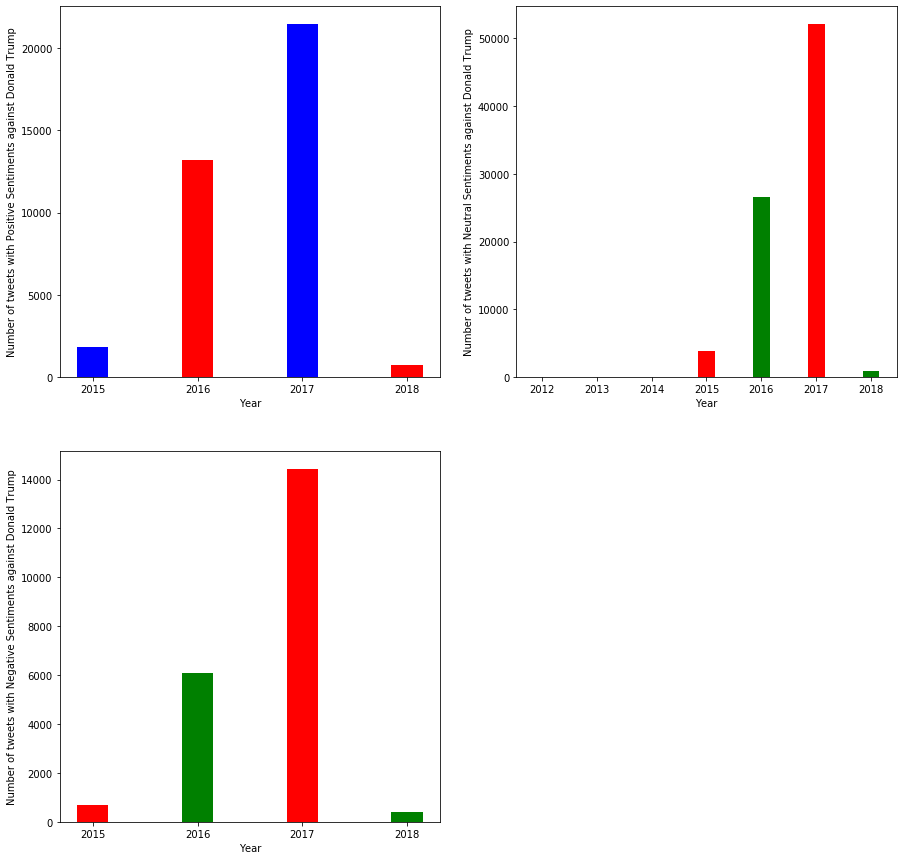

In [103]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
countpositivetrump=df_new1[df_new1['polarity'] > 0].groupby(['YearMonth']).count().reset_index()
countneutraltrump=df_new1[df_new1['polarity'] == 0].groupby(['YearMonth']).count().reset_index()
countnegativetrump=df_new1[df_new1['polarity'] < 0].groupby(['YearMonth']).count().reset_index()
w = 0.3
ax1 = plt.subplot(221)
ax1.bar(countpositivetrump['YearMonth'], countpositivetrump['polarity'], width=w, color='br', align='center')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Positive Sentiments against Donald Trump")
plt1.xlabel("Year")
ax2 = plt.subplot(222)
ax2.bar(countneutraltrump['YearMonth'], countneutraltrump['polarity'], width=w, color='gr', align='center')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt2.ylabel("Number of tweets with Neutral Sentiments against Donald Trump")
plt2.xlabel("Year")
ax3 = plt.subplot(223)
ax3.bar(countnegativetrump['YearMonth'], countnegativetrump['polarity'], width=w, color='rg', align='center')
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Negative Sentiments against Donald Trump")
plt1.xlabel("Year")
plt.show()

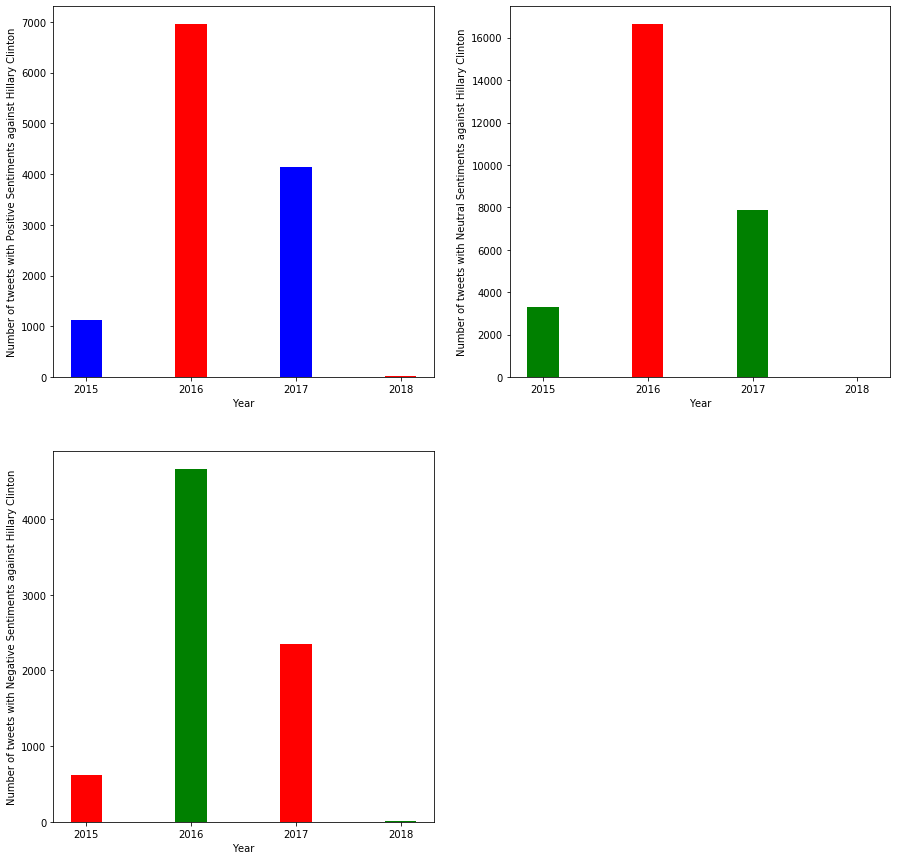

In [104]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
countpositivehillary=df_new2[df_new2['polarity'] > 0].groupby(['YearMonth']).count().reset_index()
countneutralhillary=df_new2[df_new2['polarity'] == 0].groupby(['YearMonth']).count().reset_index()
countnegativehillary=df_new2[df_new2['polarity'] < 0].groupby(['YearMonth']).count().reset_index()
w = 0.3
ax1 = plt.subplot(221)
ax1.bar(countpositivehillary['YearMonth'], countpositivehillary['polarity'], width=w, color='br', align='center')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Positive Sentiments against Hillary Clinton")
plt1.xlabel("Year")
ax2 = plt.subplot(222)
ax2.bar(countneutralhillary['YearMonth'], countneutralhillary['polarity'], width=w, color='gr', align='center')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt2.ylabel("Number of tweets with Neutral Sentiments against Hillary Clinton")
plt2.xlabel("Year")
ax3 = plt.subplot(223)
ax3.bar(countnegativehillary['YearMonth'], countnegativehillary['polarity'], width=w, color='rg', align='center')
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Negative Sentiments against Hillary Clinton")
plt1.xlabel("Year")
plt.show()

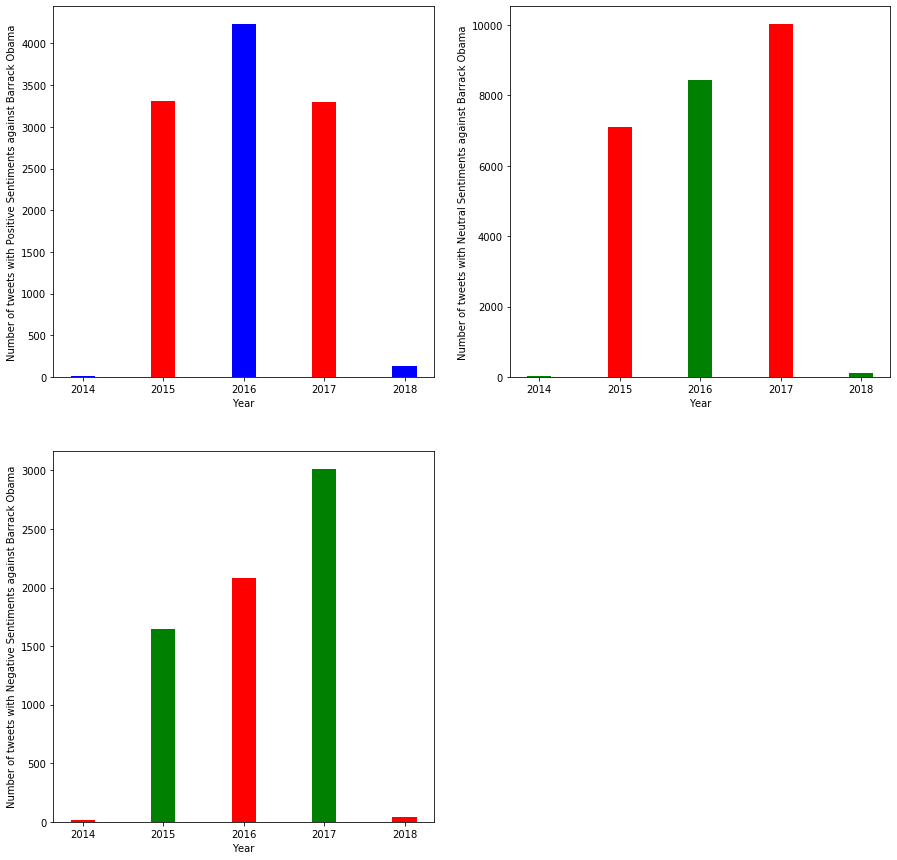

In [108]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
countpositiveobama=df_new3[df_new3['polarity'] > 0].groupby(['YearMonth']).count().reset_index()
countneutralobama=df_new3[df_new3['polarity'] == 0].groupby(['YearMonth']).count().reset_index()
countnegativeobama=df_new3[df_new3['polarity'] < 0].groupby(['YearMonth']).count().reset_index()
w = 0.3
ax1 = plt.subplot(221)
ax1.bar(countpositiveobama['YearMonth'], countpositiveobama['polarity'], width=w, color='br', align='center')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Positive Sentiments against Barrack Obama")
plt1.xlabel("Year")
ax2 = plt.subplot(222)
ax2.bar(countneutralobama['YearMonth'], countneutralobama['polarity'], width=w, color='gr', align='center')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt2.ylabel("Number of tweets with Neutral Sentiments against Barrack Obama")
plt2.xlabel("Year")
ax3 = plt.subplot(223)
ax3.bar(countnegativeobama['YearMonth'], countnegativeobama['polarity'], width=w, color='rg', align='center')
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Negative Sentiments against Barrack Obama")
plt1.xlabel("Year")
plt.show()

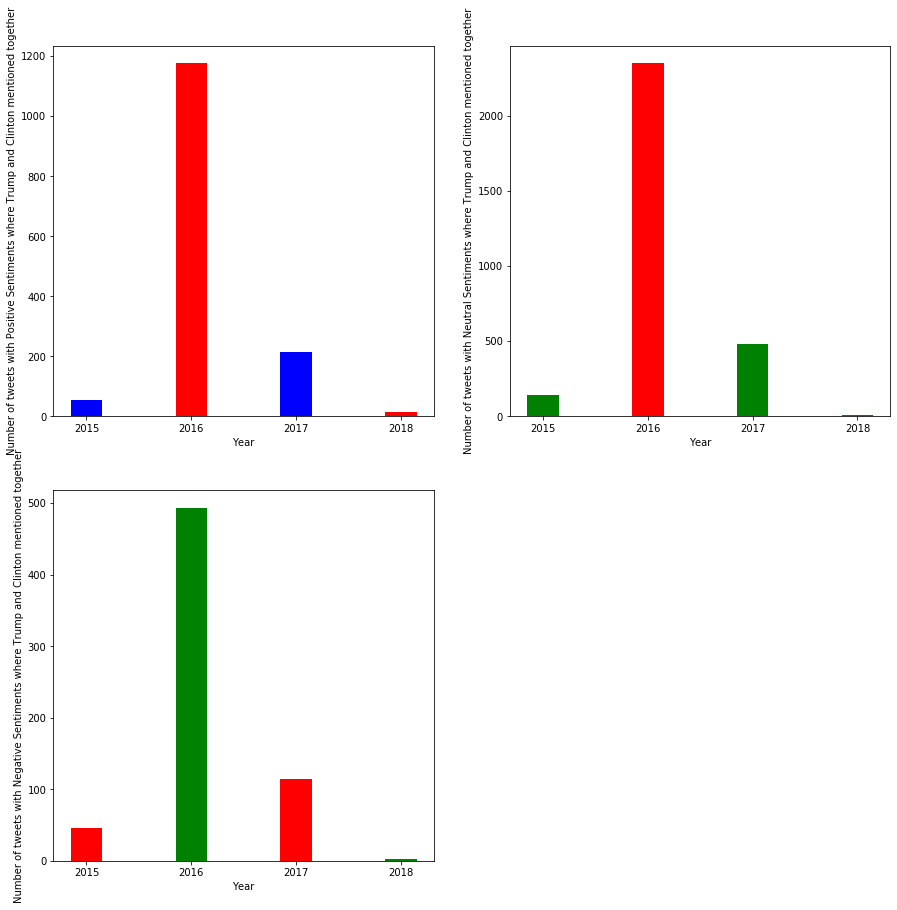

In [110]:
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
countpositiveclintru=df_new4[df_new4['polarity'] > 0].groupby(['YearMonth']).count().reset_index()
countneutralclintru=df_new4[df_new4['polarity'] == 0].groupby(['YearMonth']).count().reset_index()
countnegativeclintru=df_new4[df_new4['polarity'] < 0].groupby(['YearMonth']).count().reset_index()
w = 0.3
ax1 = plt.subplot(221)
ax1.bar(countpositiveclintru['YearMonth'], countpositiveclintru['polarity'], width=w, color='br', align='center')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Positive Sentiments where Trump and Clinton mentioned together")
plt1.xlabel("Year")
ax2 = plt.subplot(222)
ax2.bar(countneutralclintru['YearMonth'], countneutralclintru['polarity'], width=w, color='gr', align='center')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
plt2.ylabel("Number of tweets with Neutral Sentiments where Trump and Clinton mentioned together")
plt2.xlabel("Year")
ax3 = plt.subplot(223)
ax3.bar(countnegativeclintru['YearMonth'], countnegativeclintru['polarity'], width=w, color='rg', align='center')
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
plt1.ylabel("Number of tweets with Negative Sentiments where Trump and Clinton mentioned together")
plt1.xlabel("Year")
plt.show()